# Polynomial Logistic Regression
Logistic Regression on Non Linear Data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # For decision Boundary
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv('/content/ushape.csv')
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

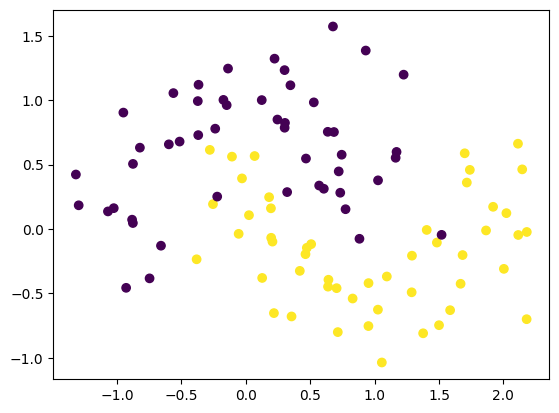

In [5]:
plt.scatter(X[:,0], X[:,1], c = y)

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

<Axes: >

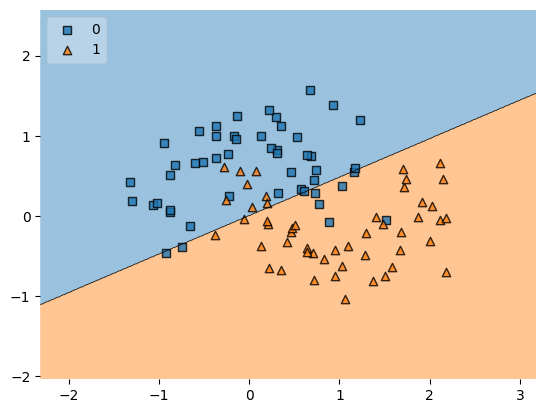

In [9]:
plot_decision_regions(X, y.astype('int'), log_reg, legend = 2)

In [13]:
print("Cross Validation Score: ", np.mean(cross_val_score(log_reg, X, y, scoring = 'accuracy', cv = 10)))

Cross Validation Score:  0.8300000000000001


## Polynomial Logistic Regression

In [15]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly.fit_transform(X)

In [16]:
log_reg1 = LogisticRegression()
print("Cross Validation Score: ", np.mean(cross_val_score(log_reg1, X_poly, y, scoring = 'accuracy', cv = 10)))

Cross Validation Score:  0.9099999999999999


In [20]:
def plot_decision_boundary(X, y, degree = 1):
  poly = PolynomialFeatures(degree = degree, include_bias = False)
  X_poly = poly.fit_transform(X)

  log_reg = LogisticRegression()
  log_reg.fit(X_poly, y)

  accuracy = np.mean(cross_val_score(log_reg, X_poly, y, scoring = 'accuracy', cv = 10))
  print("Cross Validation Score: ", accuracy)

  a = np.arange(start = X[:,0].min()-1, stop = X[:,0].max()+1, step = 0.01)
  b = np.arange(start = X[:,1].min()-1, stop = X[:,1].max()+1, step = 0.01)

  XX, YY = np.meshgrid(a,b)

  input_array = np.array([XX.ravel(), YY.ravel()]).T

  labels = log_reg.predict(poly.transform(input_array))

  plt.contourf(XX, YY, labels.reshape(XX.shape), alpha = 0.5)
  plt.scatter(X[:,0], X[:,1], c = y)
  plt.title("Degree = {}, Accuracy = {}".format(degree, np.round(accuracy, 4)))

Cross Validation Score:  0.8300000000000001


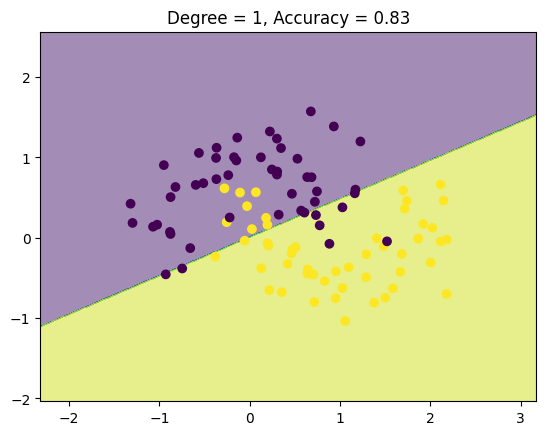

In [21]:
plot_decision_boundary(X, y)

Cross Validation Score:  0.8300000000000001


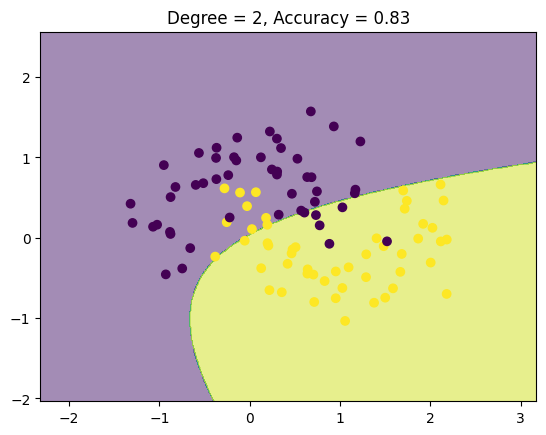

In [22]:
plot_decision_boundary(X, y, degree = 2)

Cross Validation Score:  0.9099999999999999


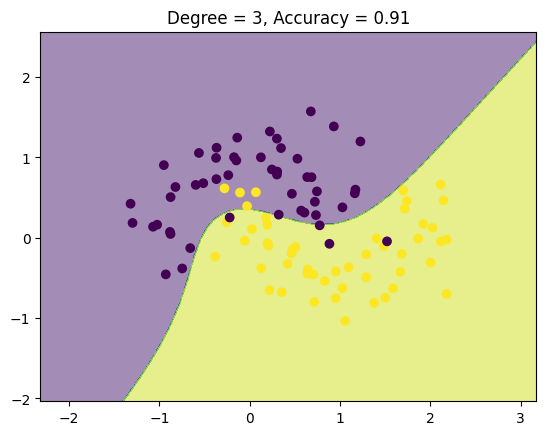

In [23]:
plot_decision_boundary(X, y, degree = 3)

Cross Validation Score:  0.9099999999999999


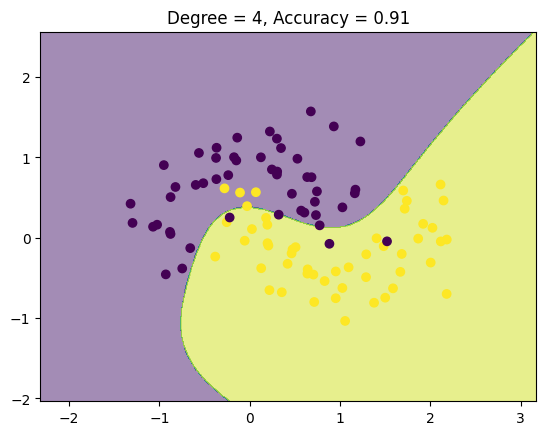

In [24]:
plot_decision_boundary(X, y, degree = 4)

Cross Validation Score:  0.9


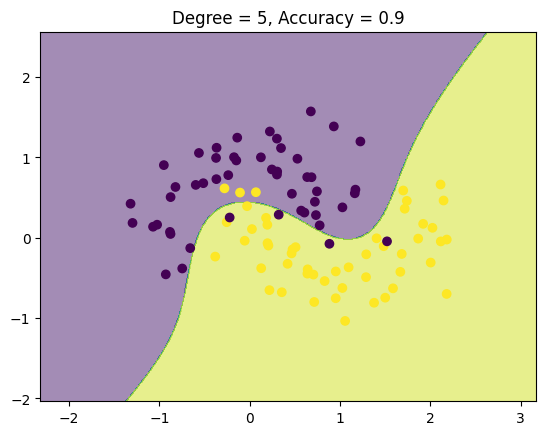

In [25]:
plot_decision_boundary(X, y, degree = 5)

Cross Validation Score:  0.9


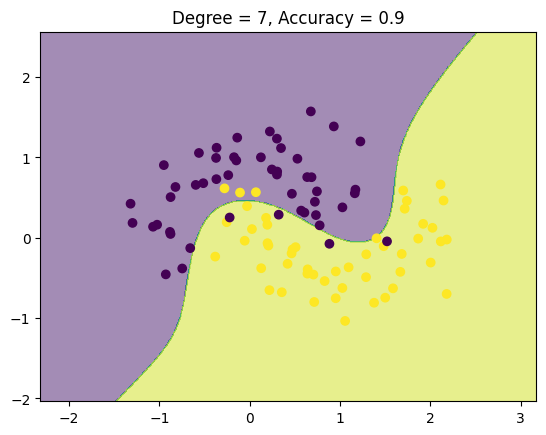

In [26]:
plot_decision_boundary(X, y, degree = 7)